## Clean Slate for Analysis

In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import the data
matrix_afps = pd.read_csv('/data1/msazizan/gatk-workflow/plotting/output-files/AHR_AHR_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv', sep='\t')

In [5]:
matrix_afps

,Chromosome,Start,End,98JKPD8_lumA_fps,ANAB5F7_basal_fps,S6R691V_her2_fps,PU24GB8_lumB_fps,2GAMBDQ_norm_fps,2GAMBDQ_norm_varsite_pos,2GAMBDQ_norm_ref_allele,...,ANAB5F7_basal_AF,PU24GB8_lumB_varsite_pos,PU24GB8_lumB_ref_allele,PU24GB8_lumB_alt_allele,PU24GB8_lumB_AF,S6R691V_her2_varsite_pos,S6R691V_her2_ref_allele,S6R691V_her2_alt_allele,S6R691V_her2_AF,region_id
0,chr1,1123504,1123513,0.05947,0.04279,0.07126,0.06663,0.05112,1123509.0,G,...,0.147059,1123509.0,G,A,0.105263,1123509.0,G,A,0.147059,chr1:1123504-1123513
1,chr1,1334103,1334112,0.05859,0.06470,0.08115,0.05821,0.05157,NaN,NaN,...,0.058824,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,chr1:1334103-1334112
2,chr1,1518493,1518502,0.02580,0.02505,0.02546,0.02915,0.02791,NaN,NaN,...,0.000000,1518498.0,G,A,0.055556,NaN,NaN,NaN,0.000000,chr1:1518493-1518502
3,chr1,1630559,1630568,0.05616,0.04834,0.08547,0.08601,0.05275,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1630564.0,C,T,0.029412,chr1:1630559-1630568
4,chr1,1759468,1759477,0.16979,0.09339,0.16180,0.16180,0.09600,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,chr1:1759468-1759477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,chrX,119404512,119404521,0.01047,0.01354,0.02048,0.01657,0.01535,NaN,NaN,...,0.000000,119404513.0,G,A,0.027778,NaN,NaN,NaN,0.000000,chrX:119404512-119404521
2582,chrX,143634790,143634799,0.02771,0.03047,0.02661,0.04590,0.04830,143634794.0,C,...,0.125000,143634794.0,C,G,0.088235,143634794.0,C,G,0.218750,chrX:143634790-143634799
2583,chrX,149471614,149471623,0.01889,0.03416,0.01712,0.01322,0.02623,NaN,NaN,...,0.000000,149471620.0,C,T,0.029412,NaN,NaN,NaN,0.000000,chrX:149471614-149471623
2584,chrX,152930685,152930694,0.02136,0.02227,0.02478,0.03098,0.01900,152930689.0,C,...,0.600000,152930689.0,C,T,0.750000,152930689.0,C,T,0.593750,chrX:152930685-152930694


In [6]:
matrix_afps_only_ix_df = matrix_afps.filter(regex='_AF$|_fps$|_id$').set_index('region_id')
matrix_afps_only_ix_df

,98JKPD8_lumA_fps,ANAB5F7_basal_fps,S6R691V_her2_fps,PU24GB8_lumB_fps,2GAMBDQ_norm_fps,2GAMBDQ_norm_AF,98JKPD8_lumA_AF,ANAB5F7_basal_AF,PU24GB8_lumB_AF,S6R691V_her2_AF
region_id,,,,,,,,,,
chr1:1123504-1123513,0.05947,0.04279,0.07126,0.06663,0.05112,0.3125,0.166667,0.147059,0.105263,0.147059
chr1:1334103-1334112,0.05859,0.06470,0.08115,0.05821,0.05157,0.0000,0.000000,0.058824,0.000000,0.000000
chr1:1518493-1518502,0.02580,0.02505,0.02546,0.02915,0.02791,0.0000,0.000000,0.000000,0.055556,0.000000
chr1:1630559-1630568,0.05616,0.04834,0.08547,0.08601,0.05275,0.0000,0.000000,0.000000,0.000000,0.029412
chr1:1759468-1759477,0.16979,0.09339,0.16180,0.16180,0.09600,0.0000,0.041667,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
chrX:119404512-119404521,0.01047,0.01354,0.02048,0.01657,0.01535,0.0000,0.000000,0.000000,0.027778,0.000000
chrX:143634790-143634799,0.02771,0.03047,0.02661,0.04590,0.04830,0.5000,0.090909,0.125000,0.088235,0.218750
chrX:149471614-149471623,0.01889,0.03416,0.01712,0.01322,0.02623,0.0000,0.000000,0.000000,0.029412,0.000000


In [9]:
# convert to long format
matrix_afps_long = matrix_afps_only_ix_df.reset_index().melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
matrix_afps_long[['sample_id', 'type']] = matrix_afps_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
matrix_afps_long = matrix_afps_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
matrix_afps_longpivot = matrix_afps_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# rename the columns to match the type values
matrix_afps_longpivot = matrix_afps_longpivot.rename(columns={'fps': 'FPS'})
matrix_afps_longpivot

type,region_id,sample_id,AF,FPS
0,chr10:101298639-101298648,2GAMBDQ_norm,0.000000,0.01788
1,chr10:101298639-101298648,98JKPD8_lumA,0.000000,0.01823
2,chr10:101298639-101298648,ANAB5F7_basal,0.031250,0.00987
3,chr10:101298639-101298648,PU24GB8_lumB,0.000000,0.02046
4,chr10:101298639-101298648,S6R691V_her2,0.029412,0.01479
...,...,...,...,...
12925,chrX:92221978-92221987,2GAMBDQ_norm,0.000000,0.01771
12926,chrX:92221978-92221987,98JKPD8_lumA,0.000000,0.03629
12927,chrX:92221978-92221987,ANAB5F7_basal,0.076923,0.00670
12928,chrX:92221978-92221987,PU24GB8_lumB,0.000000,0.02273


(0.0, 6.0)

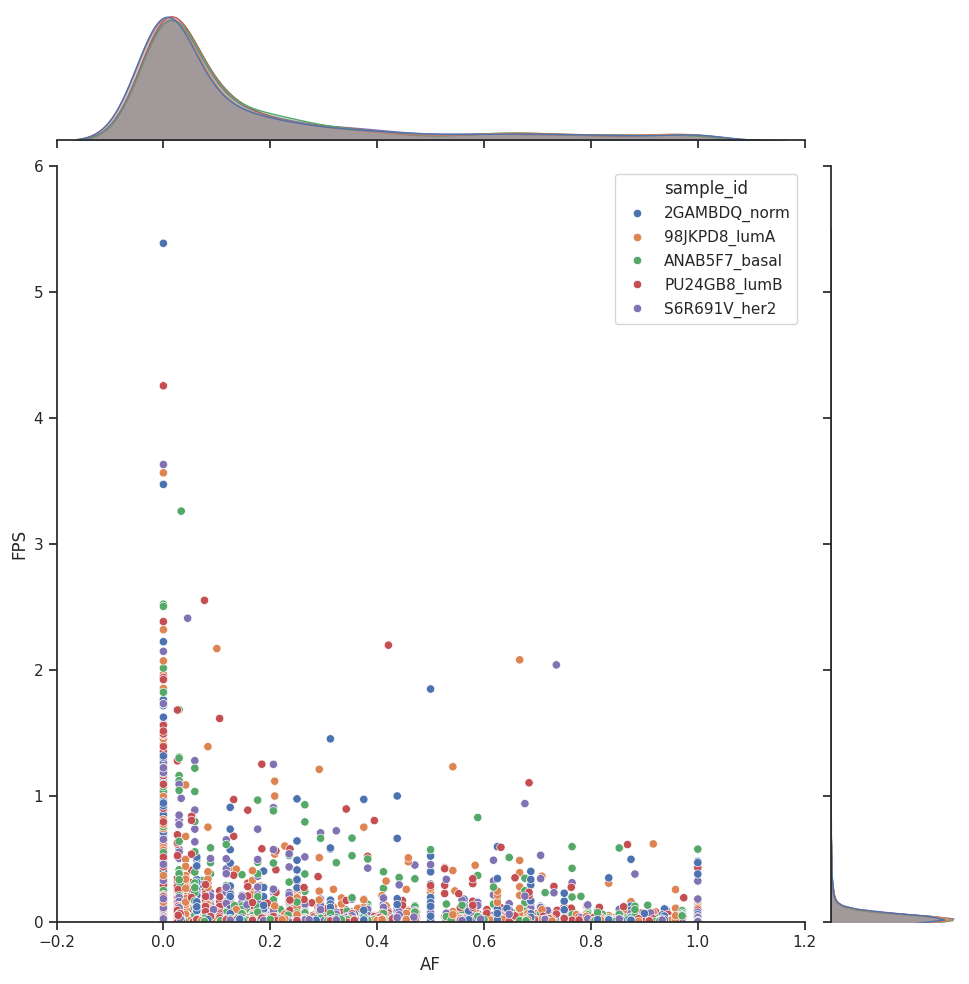

In [25]:
# plot jointplot
sns.jointplot(x="AF", y="FPS", data=matrix_afps_longpivot, hue='sample_id', height=10)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 6)

<Axes: xlabel='AF', ylabel='Count'>

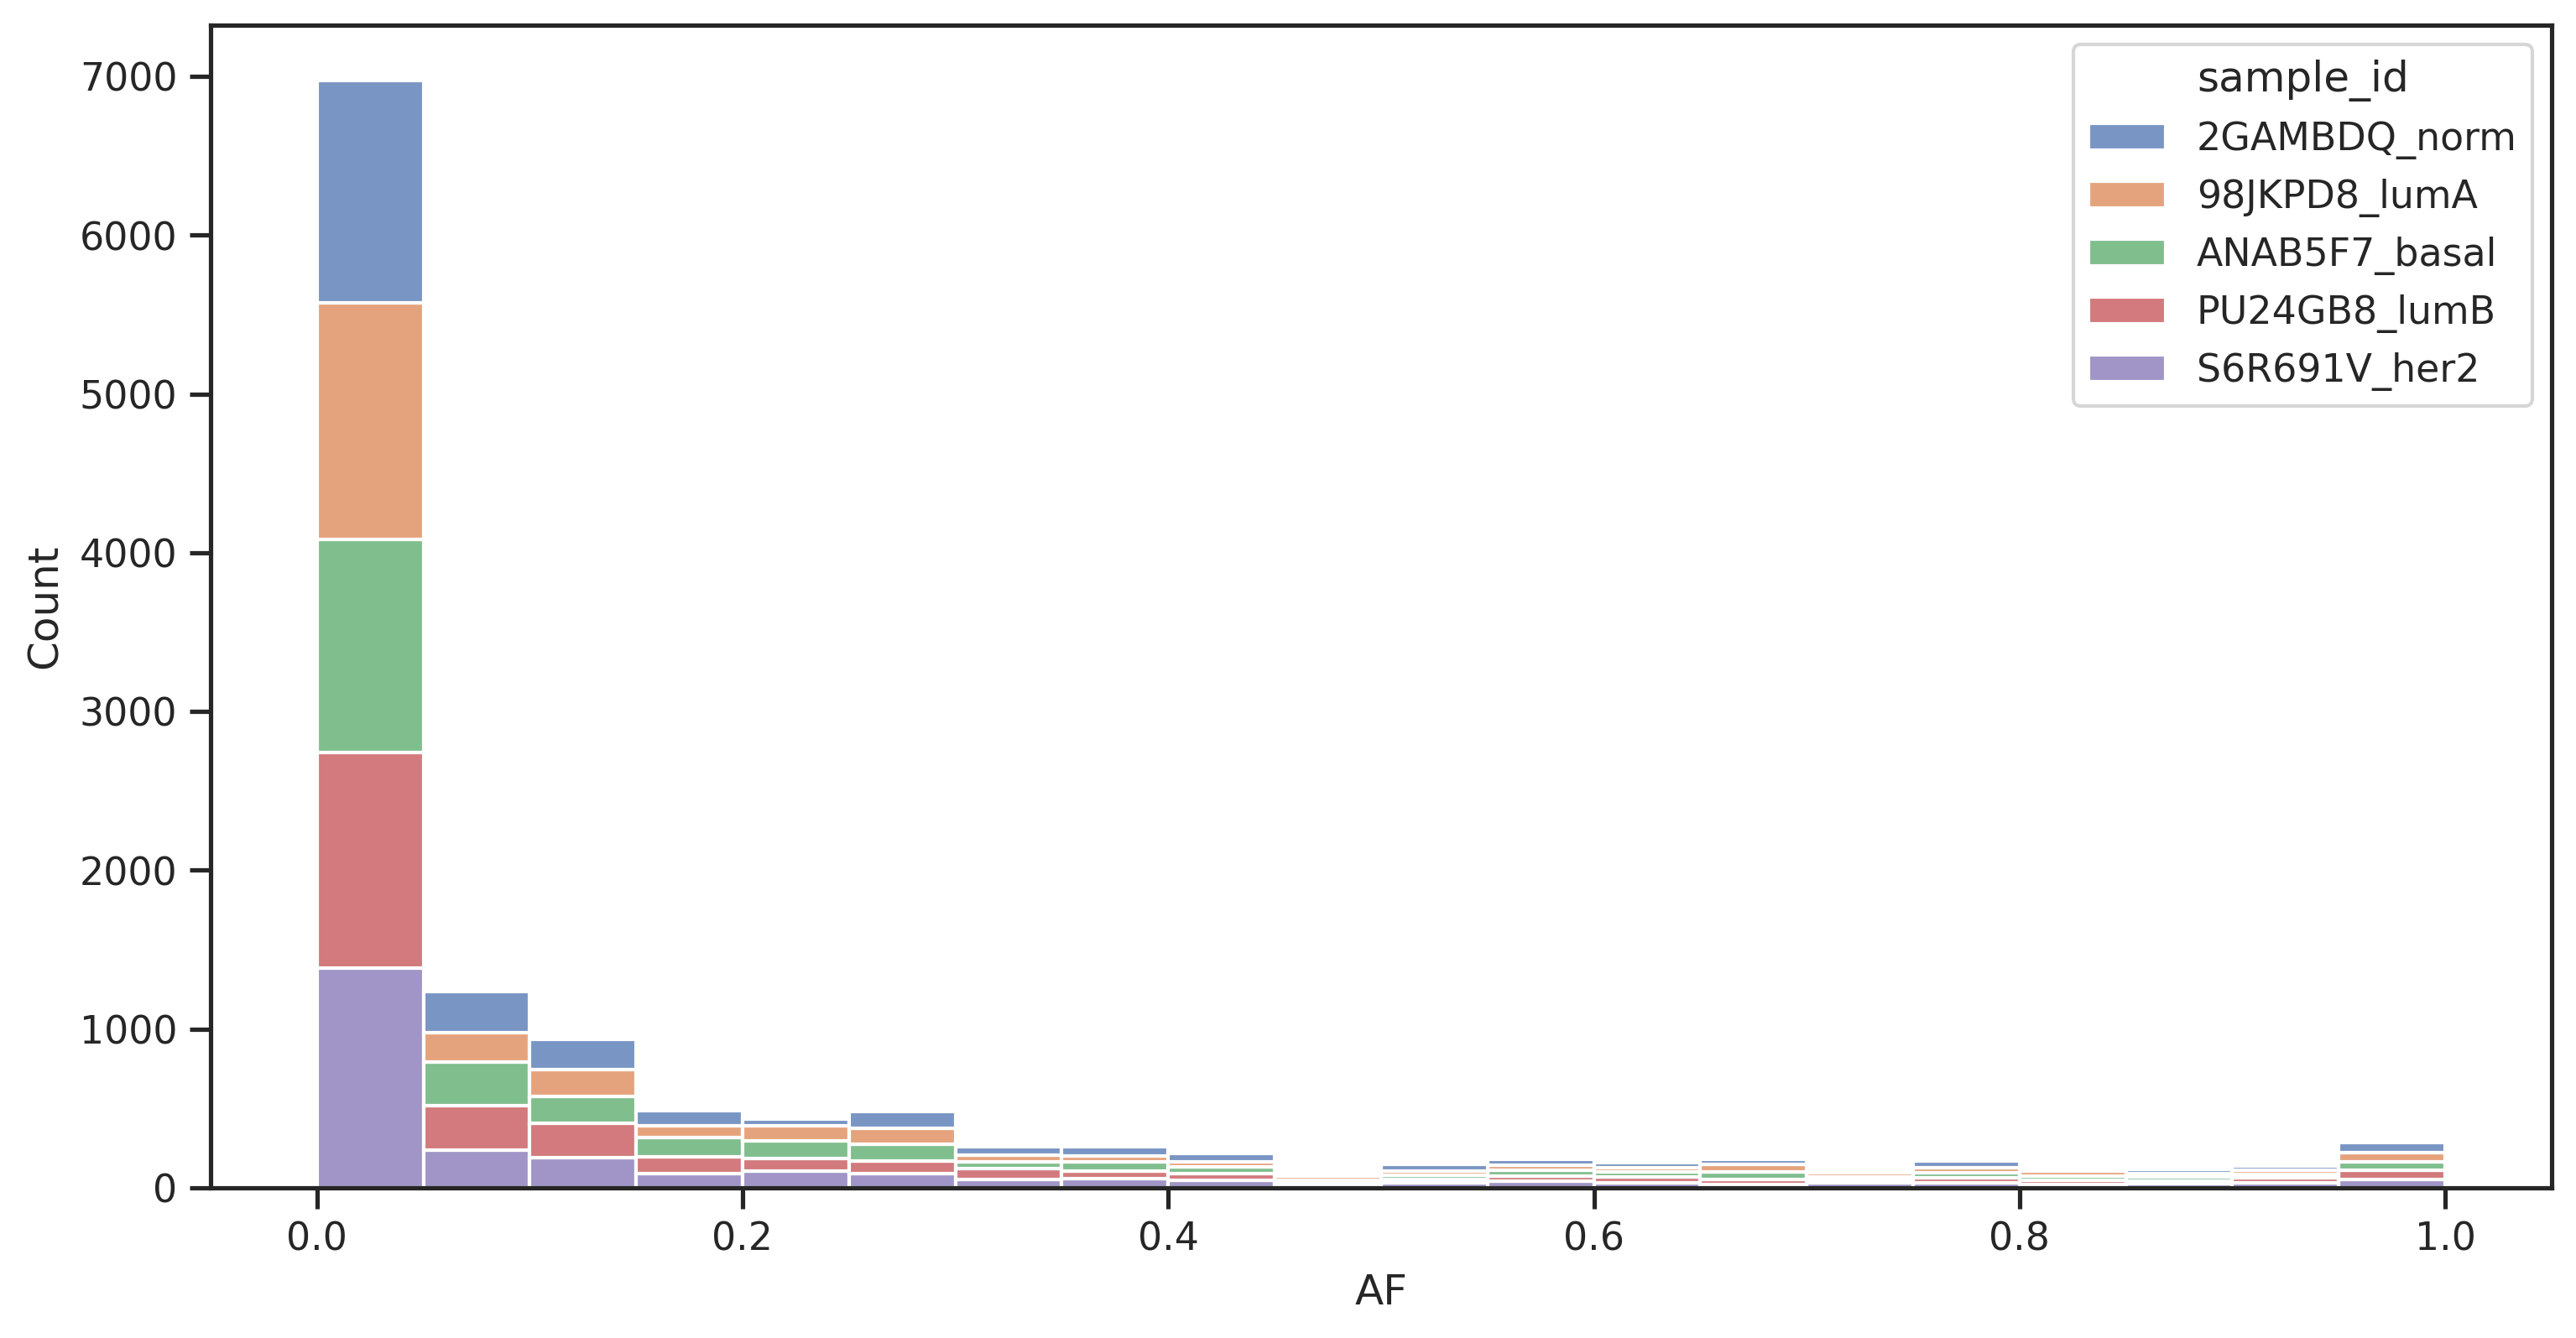

In [28]:
# stacked barplot
plt.figure(figsize=(12,6), dpi=300)
sns.histplot(x='AF', data=matrix_afps_longpivot, hue='sample_id', multiple='stack', bins=20)

In [34]:
subset

type,region_id,sample_id,AF,FPS
2,chr10:101298639-101298648,ANAB5F7_basal,0.031250,0.00987
7,chr10:101389769-101389778,ANAB5F7_basal,0.076923,0.00879
12,chr10:101617234-101617243,ANAB5F7_basal,0.000000,0.02273
17,chr10:101632225-101632234,ANAB5F7_basal,0.281250,0.01140
22,chr10:102114571-102114580,ANAB5F7_basal,0.000000,0.32285
...,...,...,...,...
12907,chrX:70613680-70613689,ANAB5F7_basal,0.000000,0.01166
12912,chrX:71076529-71076538,ANAB5F7_basal,0.000000,0.00634
12917,chrX:73181624-73181633,ANAB5F7_basal,0.166667,0.01478
12922,chrX:91752951-91752960,ANAB5F7_basal,0.200000,0.02272


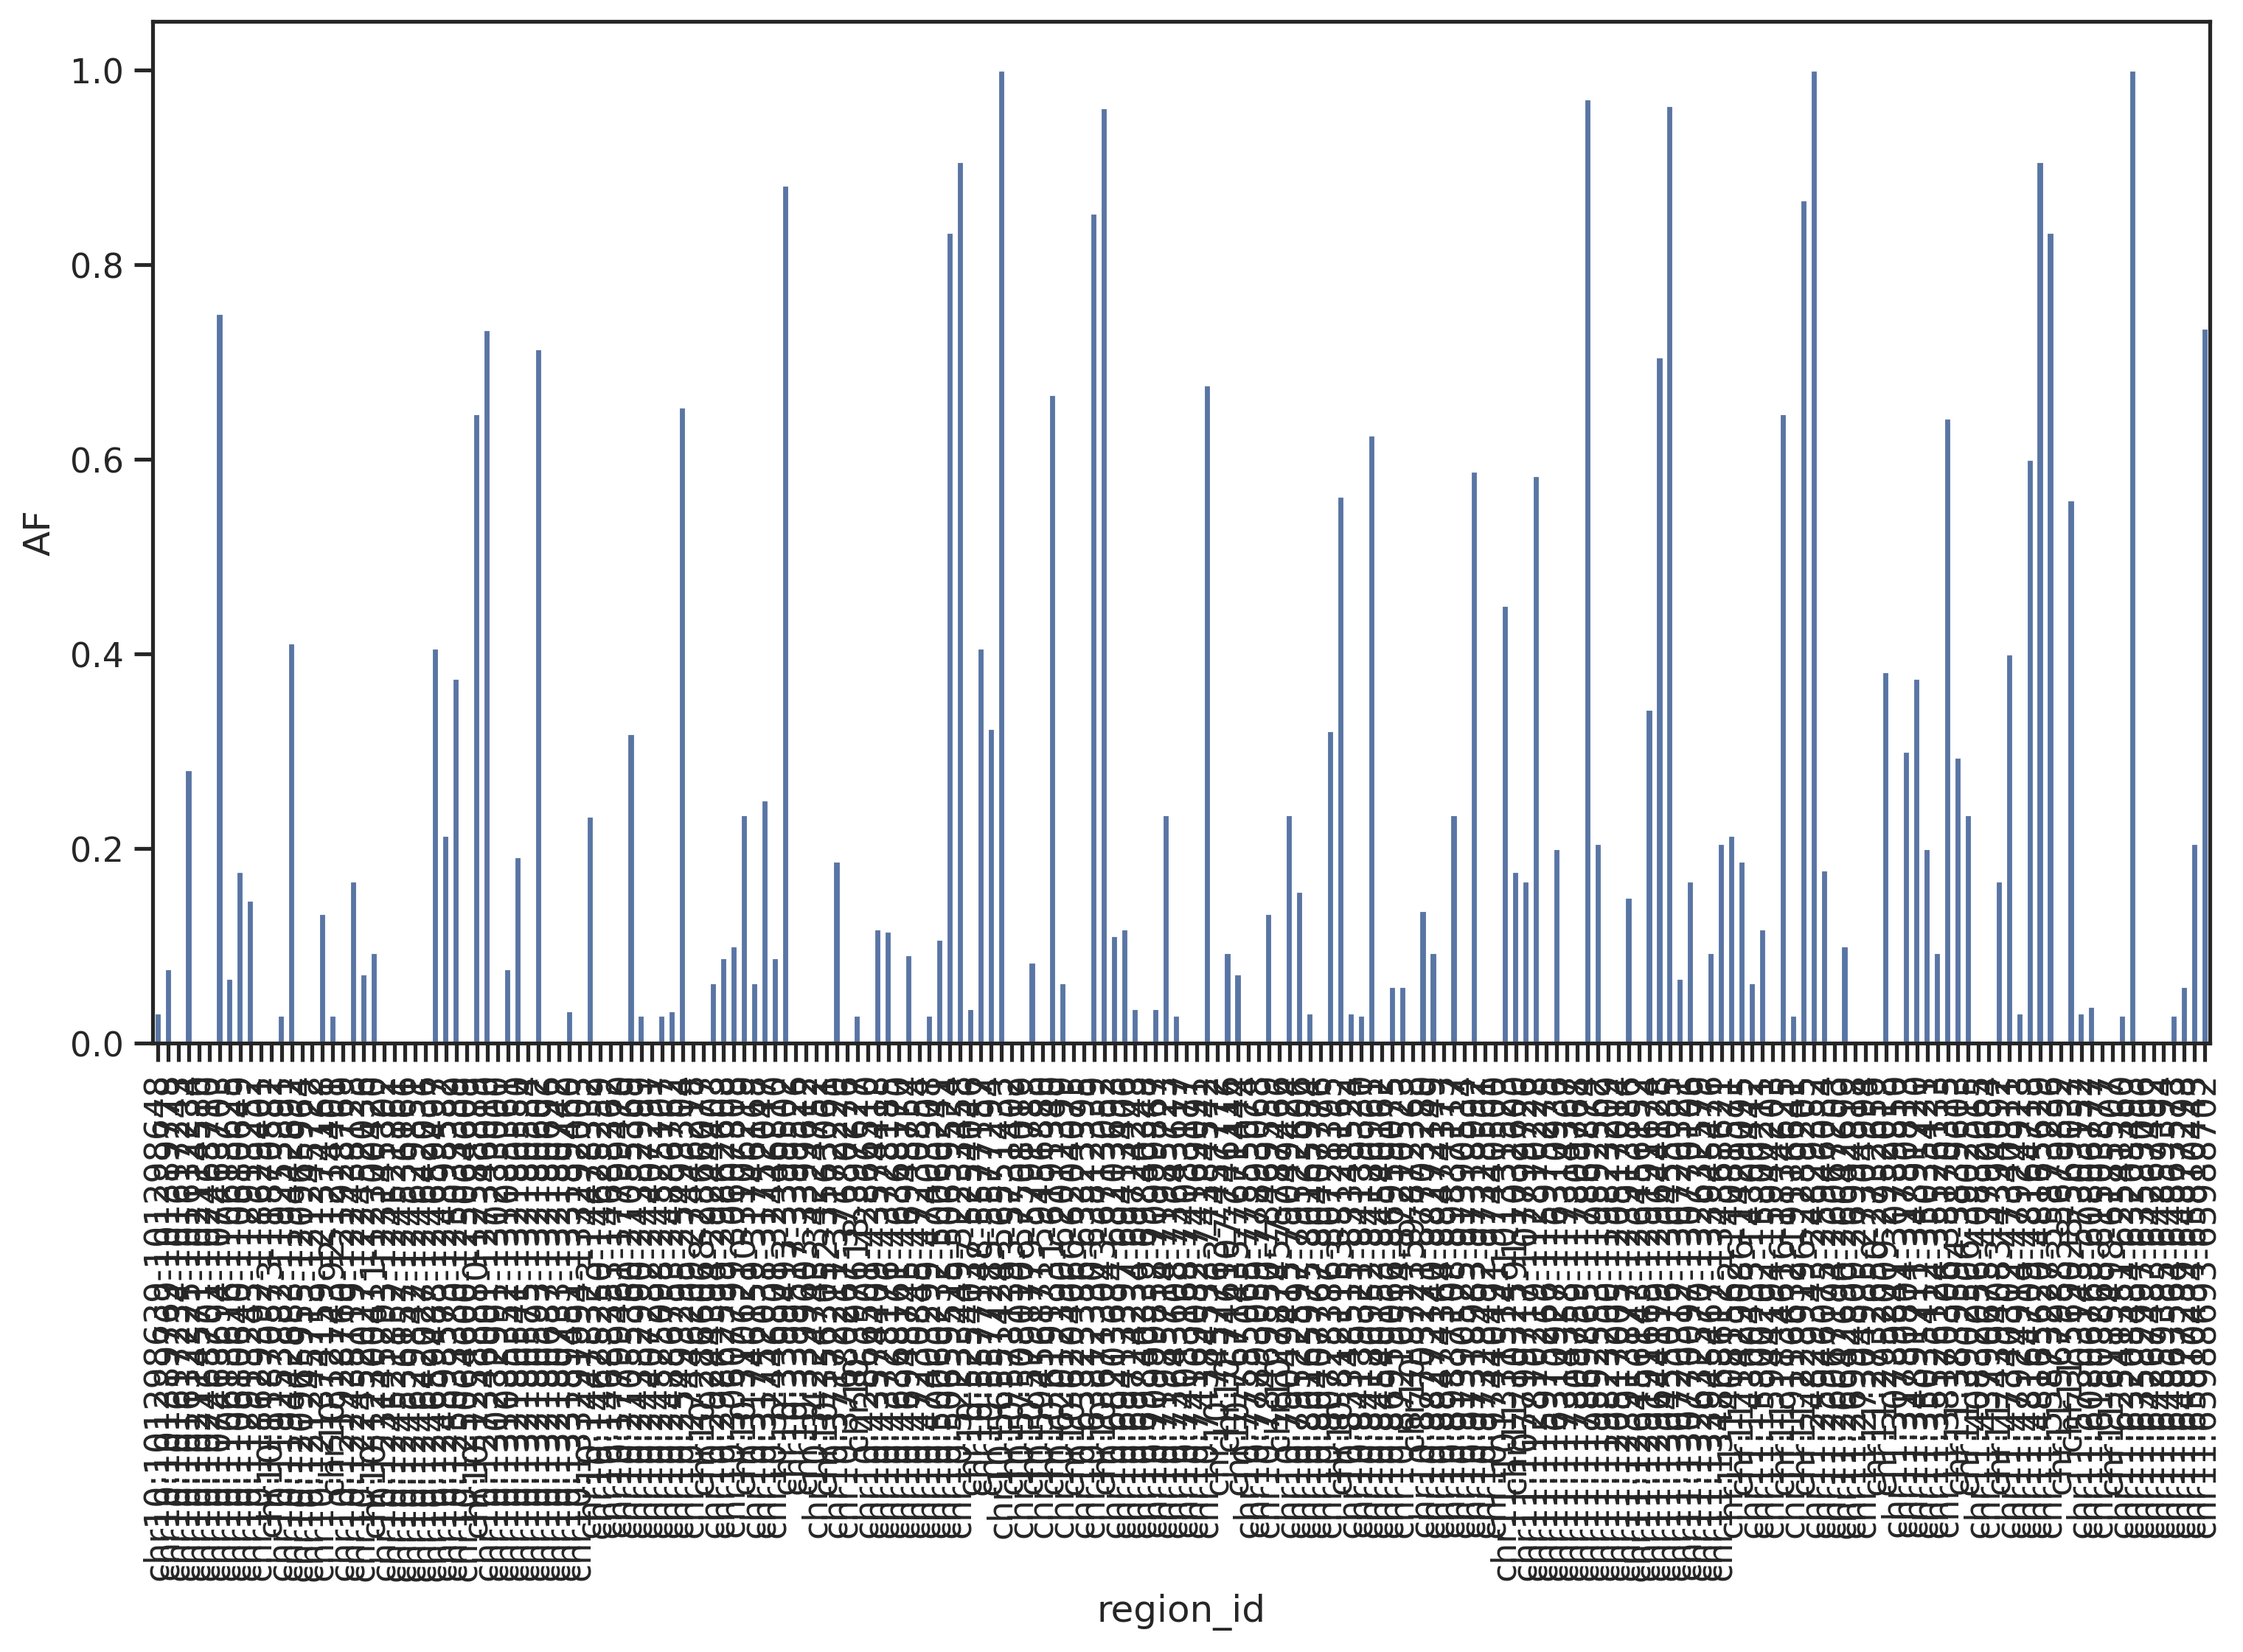

In [48]:
# draw barplot
# subset data
subset = matrix_afps_longpivot[matrix_afps_longpivot['sample_id'] == 'ANAB5F7_basal'].iloc[0:200]
plt.figure(figsize=(12,6), dpi=300)
sns.barplot(data=subset, x='region_id', y='AF')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if they are long
plt.show()

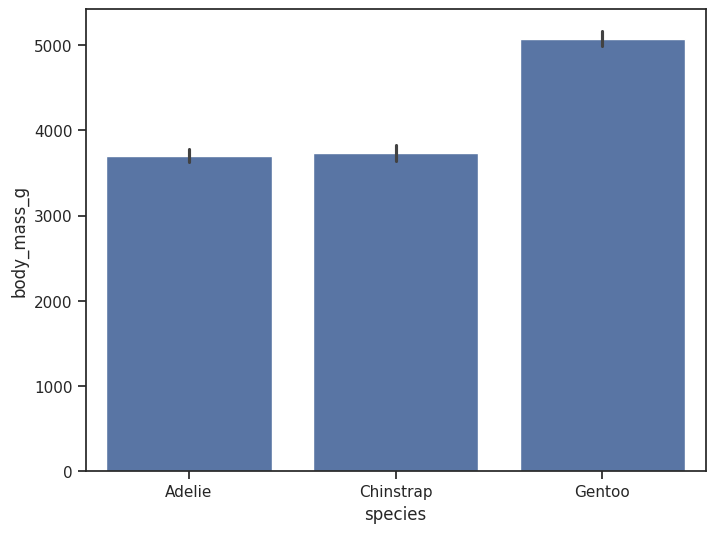

In [35]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='body_mass_g', data=penguins)
plt.show()

In [36]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
matrix_afps_longpivot[matrix_afps_longpivot['sample_id'] == 'ANAB5F7_basal'].iloc[0:20]


type,region_id,sample_id,AF,FPS
2,chr10:101298639-101298648,ANAB5F7_basal,0.031250,0.00987
7,chr10:101389769-101389778,ANAB5F7_basal,0.076923,0.00879
12,chr10:101617234-101617243,ANAB5F7_basal,0.000000,0.02273
17,chr10:101632225-101632234,ANAB5F7_basal,0.281250,0.01140
22,chr10:102114571-102114580,ANAB5F7_basal,0.000000,0.32285
27,chr10:102468701-102468710,ANAB5F7_basal,0.000000,0.02073
32,chr10:107463694-107463703,ANAB5F7_basal,0.750000,0.01379
37,chr10:110618616-110618625,ANAB5F7_basal,0.066667,0.01226
42,chr10:110680640-110680649,ANAB5F7_basal,0.176471,0.01651
47,chr10:112913243-112913252,ANAB5F7_basal,0.147059,0.02265
